# Project 2 - Kristen Kawashima

## Scientific Question: What differences in gene expression and protein structure of the mutant enzyme, ALDH2* 2, are responsible for the "flushing" reaction most commonly seen in East Asians following alcohol consumption? 

Mitochondrial aldehyde dehydrogenase (ALDH2) is an enzyme essential to the oxidation of ethanol-derived acetaldehyde. The mutant variant, ALDH2* 2, has a glutamate to lysine substitution at residue 487. This point mutation in ALDH2 is known to contribute to the carcinogenic effects of alcohol as well as an increased vulnerability to disease through the accumulation of toxic reactive aldehydes (Chen et al, 2020). 

The mutant enzyme ALDH2* 2 is responsible for the asian flush reaction found in approximately 50% of the Asian population. Due to its nearly inactive form, those with ALDH2* 2 gene suffer from elevated levels of the toxin, acetaldehyde (Larson et al., 2007). The structural properties of the ALDH2 enzyme has been studied, confirming that interactions between Glu-487 and Arg-264 and Arg-475 are critical to linking the coenzymebinding site to that of the active site (Larson et al, 2007). 

The protein sequences of the wildtype and mutant human ALDH2 enzyme (https://www.uniprot.org/uniprot/P05091) was found on Uniprot Knowledge database. Uniprot was also used to find the ALDH2 enzymes found in the following species: rat (https://www.uniprot.org/uniprot/P11884), mouse https://www.uniprot.org/uniprot/P47738), horse (https://www.uniprot.org/uniprot/P12762), pig (https://www.uniprot.org/uniprot/Q2XQV4). According to their website, Uniprot's mission is to "provide the scientific community with a comprehensive, high-quality and freely accessible resource of protein sequence and functional information." 

Structural data for ALDH2*2 mutant enzyme was found using RCSB PDB (https://www.rcsb.org). RCSB PDB (Research Collaboratory for Structural Bioinformatics Protein Data Bank) provides access to 3D structure data for biological molecules including DNA, RNA, and proteins. According to their website, they are the "1st open access digital resource in all of biology and medicine" and are a "leading global resource for experimental data central to scientific discovery."

## Hypothesis: If the single point mutation in the mutant enzyme, ALDH2* 2 is responsible for the "asian flush reaction" due to acetaldehyde over-accumulation, then we would expect to see a conformational change responsible for decreased enzymatic activity in oxidation of acetaldehyde in its protein structure. 

The ALDH2 enzyme and its mutant variant, ALDH2* 2 has been highly studied to better understand the structural properties and mechanics that lead to the downregulation of enzymatic function in the alcohol metabolism.

To answer my scientific question and hypothesis, I utilized pre-determined protein sequences for the mutant and wildtype ALDH2 enzyme and compared their sequence identities using pairwise sequence alignment. To investigate the structural differences that may be attributed to the differences in enzymatic function, I utilized structural data from RSCB PDB to generate a Homology Model. 

In order to visualize homologies in protein sequences between the mutant ALDH2 enzyme and wildtype ALDH2 enzymes found across different species, 
I used SequenceLogos to highlight the most common amino acids located across 40 resides surrounding the ALDH2*2 point mutation. To analyze the structural models of the mutant and wildtype enzymes, I used PyMOL to generate a 3D structure of the proteins and look for visual similarities that may suggest the point mutation in ALDH2*2 is responsible for the downregulation of enzymatic function seen in the ALDH2*2 gene. 

## Part 1: Load the Packages
Packages loaded include the following:

Biopython: Biopython is a package that includes multiple different subpackages used for biological computation. It includes packages such as SeqIO, AlignIO, Seq, and pairwise2, which are used in conjunction to perform Pairwise and Multiple Sequence Alignments on sets of sequences. For further information on Biopython and its available subpacakages for biological computation, see: https://biopython.org/.

NumPy: NumPy is an open-source Python Library used to create arrays and matrices. It allows for the application of a wide variety of mathematical operations on arrays and guarantees efficient calculatiosn with arrays and matrices. To learn more about NumPy, see: https://numpy.org/doc/stable/user/absolute_beginners.html. 

Pandas: Pandas is an open source data analysis and manipulation tool used in Python. Some notable uses for Pandas includes: creating DataFrames for data manipulation, reading and writing data between in-memory data structures and different file formats, as well as editting data set composition by adding and deleting columns. To learn more about Pandas, see: https://pandas.pydata.org/. 

Logomaker: Logomaker is a Python package for generating sequence logos. Logomaker can be used to generate standard and highly customized logos to visualize DNA, RNA, or protein sequences. A few examples of the sequence logos that can be generated include: energy logos, probability logos, and enrichment logos. To learn more about Logomaker, see: https://logomaker.readthedocs.io/en/latest/.

SWISS-MODEL: SWISS-MODEL is a bioinformatics server used to create homology models of 3D protein structures. SWISS-Model is often used in conjunction with PDB as homology models are generated using the amino acid sequence of a target protein and a structural template file downloaded in the form of a PDB (Protein Database) file. According to their website, SWISS-MODEL has the purpose of making "protein modelling accessible to all life science researchers worldwide." To learn more about SWISS-MODEL, see: https://swissmodel.expasy.org/

PyMOL (Not directly used in code): Pymol is a visualization software for molecules and proteins. It is able to fetch data from databases including RCSB (https://www.rcsb.org/) and generates a 3D image of the protein. Using this software, the 3D structure can be analyzed, such that specific regions can be isolated. Since PyMOL is an independent program, the generated structure has been integrated into the Python code. To learn more about PyMOL, see: https://pymol.org/2/.


(10 points for definition of each of the packages loaded; 5 points for correctly loading all of the packages needed and stating anything that needs to be done to load the packages (downloading the packages)

In [93]:
#Package obtained through Anaconda Navigator, running shows installation has already been completed
#pip install biopython

In [27]:
#Package obtained through Anaconda Navigator, running shows installation has already been completed
#pip install numpy

In [28]:
#Package obtained through Anaconda Navigator, running shows installation has already been completed
#pip install pandas

In [31]:
#Package obtained through Anaconda Navigator, running shows installation has already been completed
#pip install logomaker

In [110]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio import Seq
from Bio import SeqIO
import numpy as np
import pandas as pd
import logomaker as lm
import nglview
from Bio.PDB.PDBParser import PDBParser

## Part 2A: Load in the data and perform Bioinformatics Analyses - Pairwise Sequence Alignment 

FASTA files are text-based formats that represent nucleotide or amino acid sequences using single letter codes with all information pertaining to the sequence found in the line prior. For the purpose of this scientific question and hypothesis, we are using FASTA files for the protein sequences of the wildtype and mutant ALDH2 enzymes. 

In the code below, we are using these files to run a Pairwise Sequence Alignment, which is used to identify regions of similarity between two nucleotide or amino acid sequences. Pairwise Sequence Alignments are often used to pin point regions that may suggest functional, structural or evolutionary relationships between the the sequences in question. The score generated by the code represents the number of matching proteins.

In [63]:
#load sequences (downloaded from uniprot in FASTA format)
ALDH2_WT = SeqIO.read("ALDH2.fasta", "fasta")
ALDH2_Mut = SeqIO.read("ALDH2*2.fasta", "fasta")
#test print variable
#print(ALDH2_WT)

In [64]:
#convert seq object 
#all of the following are global variables:
ALDH2_WT = ALDH2_WT.seq
ALDH2_Mut = ALDH2_Mut.seq

#test print variable
#print(ALDH2_WT)

In [66]:
#align sequences
for a in pairwise2.align.globalxx(ALDH2_WT, ALDH2_Mut):
    #format_alignment returns alignment with lines representing matches.
    print(format_alignment(*a))

MLRAAARFGPRLGRRLLSAAATQAVPAPNQQPEVFCNQIFINNEWHDAVSRKTFPTVNPSTGEVICQVAEGDKEDVDKAVKAARAAFQLGSPWRRMDASHRGRLLNRLADLIERDRTYLAALETLDNGKPYVISYLVDLDMVLKCLRYYAGWADKYHGKTIPIDGDFFSYTRHEPVGVCGQIIPWNFPLLMQAWKLGPALATGNVVVMKVAEQTPLTALYVANLIKEAGFPPGVVNIVPGFGPTAGAAIASHEDVDKVAFTGSTEIGRVIQVAAGSSNLKRVTLELGGKSPNIIMSDADMDWAVEQAHFALFFNQGQCCCAGSRTFVQEDIYDEFVERSVARAKSRVVGNPFDSKTEQGPQVDETQFKKILGYINTGKQEGAKLLCGGGIAADRGYFIQPTVFGDVQDGMTIAKEEIFGPVMQILKFKTIEEVVGRANNSTYGLAAAVFTKDLDKANYLSQALQAGTVWVNCYDVFGAQSPFGGYKMSGSGRELGEYGLQAYTE-VKTVTVKVPQKNS
|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

## Part 2B: Perform Bioinformatics Analysis - Homology Modeling

Homology Modeling generates a three dimensional protein model using previously determined structures of related family proteins as templates. Homology modeling is performed using SWISS-MODEL (https://swissmodel.expasy.org/), which is a protein-structure homology-modelling server intended "to make protein modelling accessible to all life sceince researchers world wide." 

In order to create a homology model, a target sequence, as well as a template file is required. For the construction of a ALDH2*2 homology model, the target sequence would be the ALDH2*2 sequence, which contains the point mutation at residue 487, while the target file would be a pre-existing wildtype ALDH2 PDB (Protein Data Bank) file, such as: 1zum.pdb (https://www.rcsb.org/structure/1ZUM).

In the Homology Model generated, we are able to determine the quality of the homology model by looking at the color of the residues generated on the 3D structures. Residues in blue have high confidence scores and are very similar or identical to the template strand, while the residues marked in red represent low confidence scores and mark where there are differences. Moreover, in looking at the Model-Template alignment, we are able to mark exactly where points of difference are. It should also be noted that in looking at the QMean score, negative values represent higher quality and stability.


Note: 
<br> In the construction of my homology model, all relevant ALDH2 data sets found on PDB contained unmarked resides, which brought up the error: "Chains E, F, G, H of the uploaded template contain unordered residues. Residue numbers must occur in ascending order. That way, the structure does not apply for modelling." 
<br> Due to this issue, I used the "Sequences" input to search for potential templates, rather than uploading my own template file, and had to use a pre-existing model for my Homology Model. 
<br> The issue with this is that almost all of the models available for analysis on PDB are complexed with a ligand such as NAD+ or Alda-1, which may affect the structure of the enzyme we are trying to visualize. Since I was unable to use the apo ALDH2 structures (those that are not attached to a ligand), I considered using the this model:https://www.rcsb.org/structure/2ONM  as the template, so I could make a homology model of the wild-type ALDH2 enzyme bound to NAD+ to be compared to the template file. Since the provided model contained the same unmodeled residues, I was unable to use the file as a template without giving rise to the same error I previously mentioned.

In [117]:
view = nglview.show_structure_file("model_02.pdb")
view

NGLWidget()

Structure Showing Confidence support:
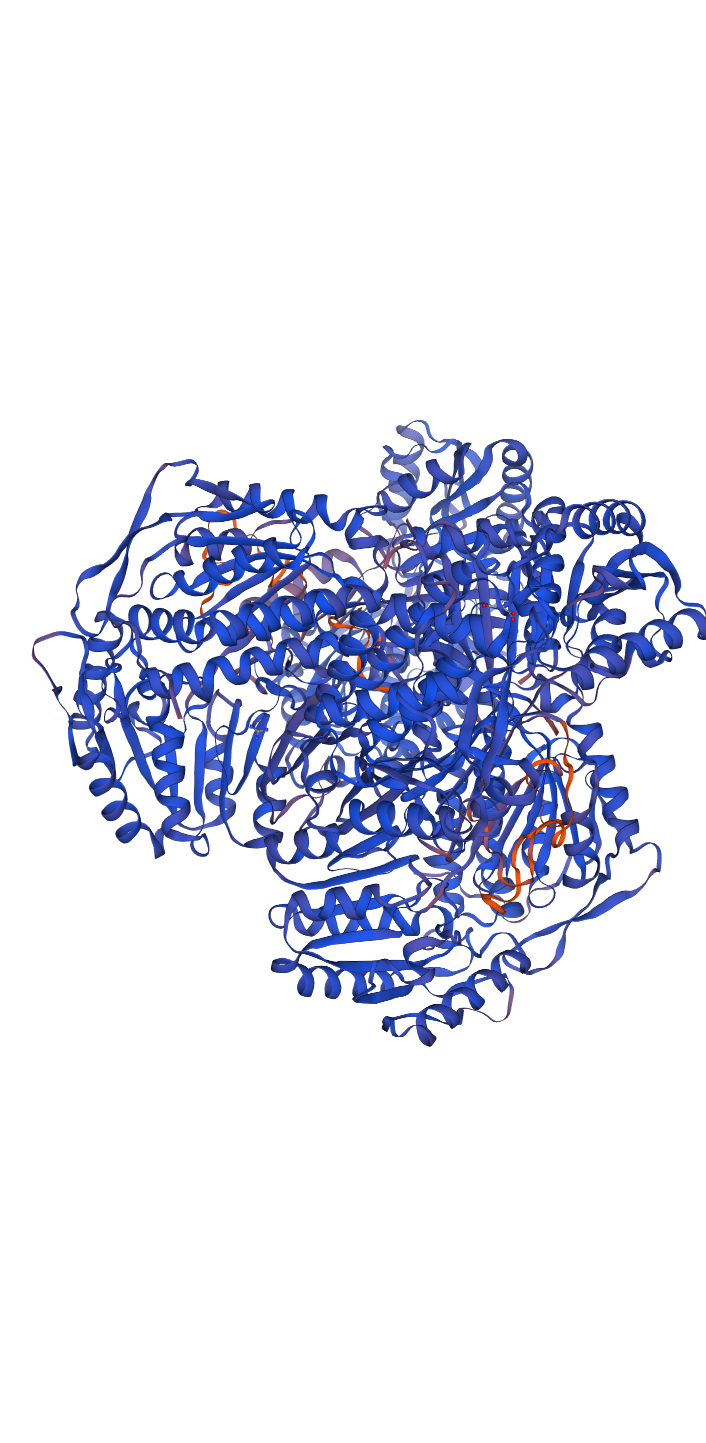

Local quality estimate of Homology Model:
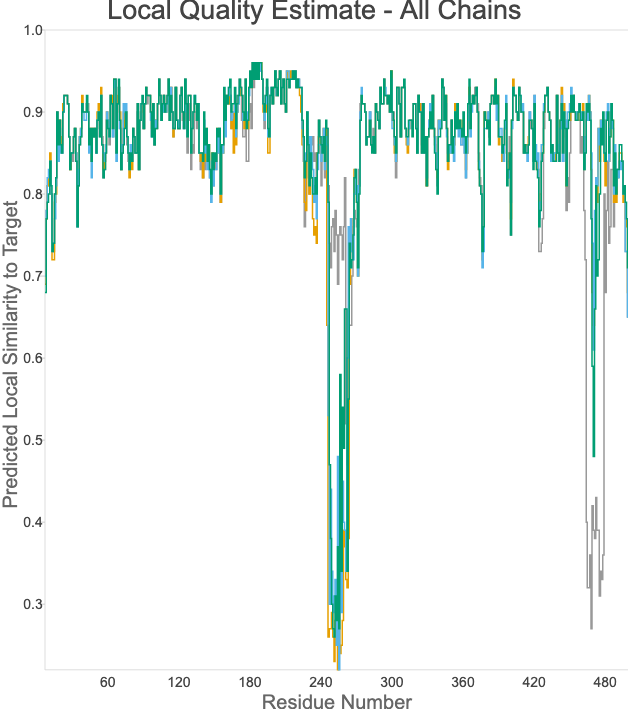


Quality Comparison:
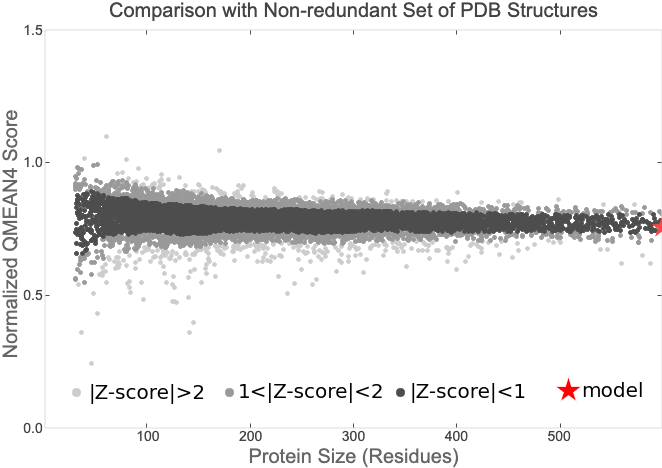

## Part 3A: Create Sequence Logos to display pairwise sequence alignment 

A sequence logo is a way to graphically visualize amino acid or DNA sequences. Sequence logos can be generated to visualize CRP energy, splice site probability, as well as ARS enrichment across a biological sequence. For this sequence logo, we will be visualizing the relative frequency of amino acids across a parsed multiple sequence alignment, where the size of amino acid in the sequence logo is representative of the frequency of that amino acid at that specific location in the protein sequence. In other words, the larger the size of the single letter code, the higher the "more likely" that amino acid is located at that location (when comparing multiple sequences).  

For my scientific question and hypothesis, Logomaker will be used to visualize the most common amino acids of six different amino acid sequences spanning from residue 477-517, surrounding the E487K mutation of ALDH2*2. The ALDH2 protein sequences of several different species were saved from Uniprot and loaded into a single FASTA file: P05091 (human WT), P05091|VAR_002248| (human mutant), Q2XQV4 (pig), P12762 (horse), P47738 (mouse), P11884 (rat). Since these sequences were of different lengths, they were pre-aligned using Uniprot (due to complications with AlignIO and sequences of different lengths).  

In [100]:
#The following files were cropped to only contain amino acids surrounding residue 504. 
#sequences were pre-aligned using Uniprot and downloaded in the form of a fasta file due to different sequence lengths 
for seq_record in SeqIO.parse('ALDH2_Shortened.fasta', 'fasta'):
    #print sequence identifier
    print(repr(seq_record.id))
    #print protein sequences
    print(repr(seq_record.seq))
    #print sequence length
    print(len(seq_record))

'P05091'
Seq('GAQSPFGGYKMSGSGRELGEYGLQAYTEVKTVTVKVPQKNS')
41
'P05091|VAR_002248|'
Seq('GAQSPFGGYKMSGSGRELGEYGLQAYTKVKTVTVKVPQKNS')
41
'Q2XQV4'
Seq('GAQSPFGGYKLSGSGRELGEYGLQAYTEVKTVTVKVPQKNS')
41
'P12762'
Seq('GAQSPFGGYKMSGNGRELGEYGLQAYTEVKTVTIKVPQKNS')
41
'P47738'
Seq('GAQSPFGGYKMSGSGRELGEYGLQAYTEVKTVTVKVPQKNS')
41
'P11884'
Seq('GAQSPFGGYKMSGSGRELGEYGLQAYTEVKTVTVKVPQKNS')
41


In [105]:
#read sequences into a DataFrame 
sequences_df = pd.read_csv('ALDH2_Shortened.fasta', comment='>', names=['site'])

#preview the first 4 sequences of the DataFrame
#sequences_df.head()

#print all sequences
print(sequences_df)

                                        site
0  GAQSPFGGYKMSGSGRELGEYGLQAYTEVKTVTVKVPQKNS
1  GAQSPFGGYKMSGSGRELGEYGLQAYTKVKTVTVKVPQKNS
2  GAQSPFGGYKLSGSGRELGEYGLQAYTEVKTVTVKVPQKNS
3  GAQSPFGGYKMSGNGRELGEYGLQAYTEVKTVTIKVPQKNS
4  GAQSPFGGYKMSGSGRELGEYGLQAYTEVKTVTVKVPQKNS
5  GAQSPFGGYKMSGSGRELGEYGLQAYTEVKTVTVKVPQKNS


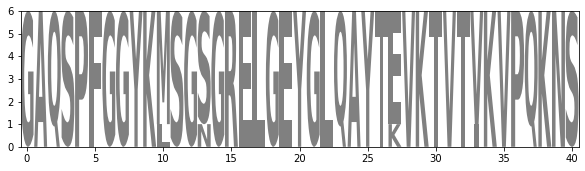

In [99]:
#organize list of sequence sites to make data compatible for sequence logo construction
sequences_sites_list = sequences_df['site'].values
sequences_sites_list[:6]
#print sequence logos figure
seq_counts_df =lm.alignment_to_matrix(sequences=sequences_sites_list, to_type='counts')
lm.Logo(seq_counts_df)

## Part 3B:  Create a 3D Protein Model Using Pymol

Using PyMOL, 3D Protein models and measurements can be generated to pin point where mutations have caused conformational changes in protein structure. This was completed by using the Homology Model generated in Part2B of the project, as well as using data from PDB as aforementioned. The specific sequence data used to generate the 3D models were: 1ZUM(https://www.rcsb.org/structure/1ZUM), and 1O05 (https://www.rcsb.org/structure/1O05)

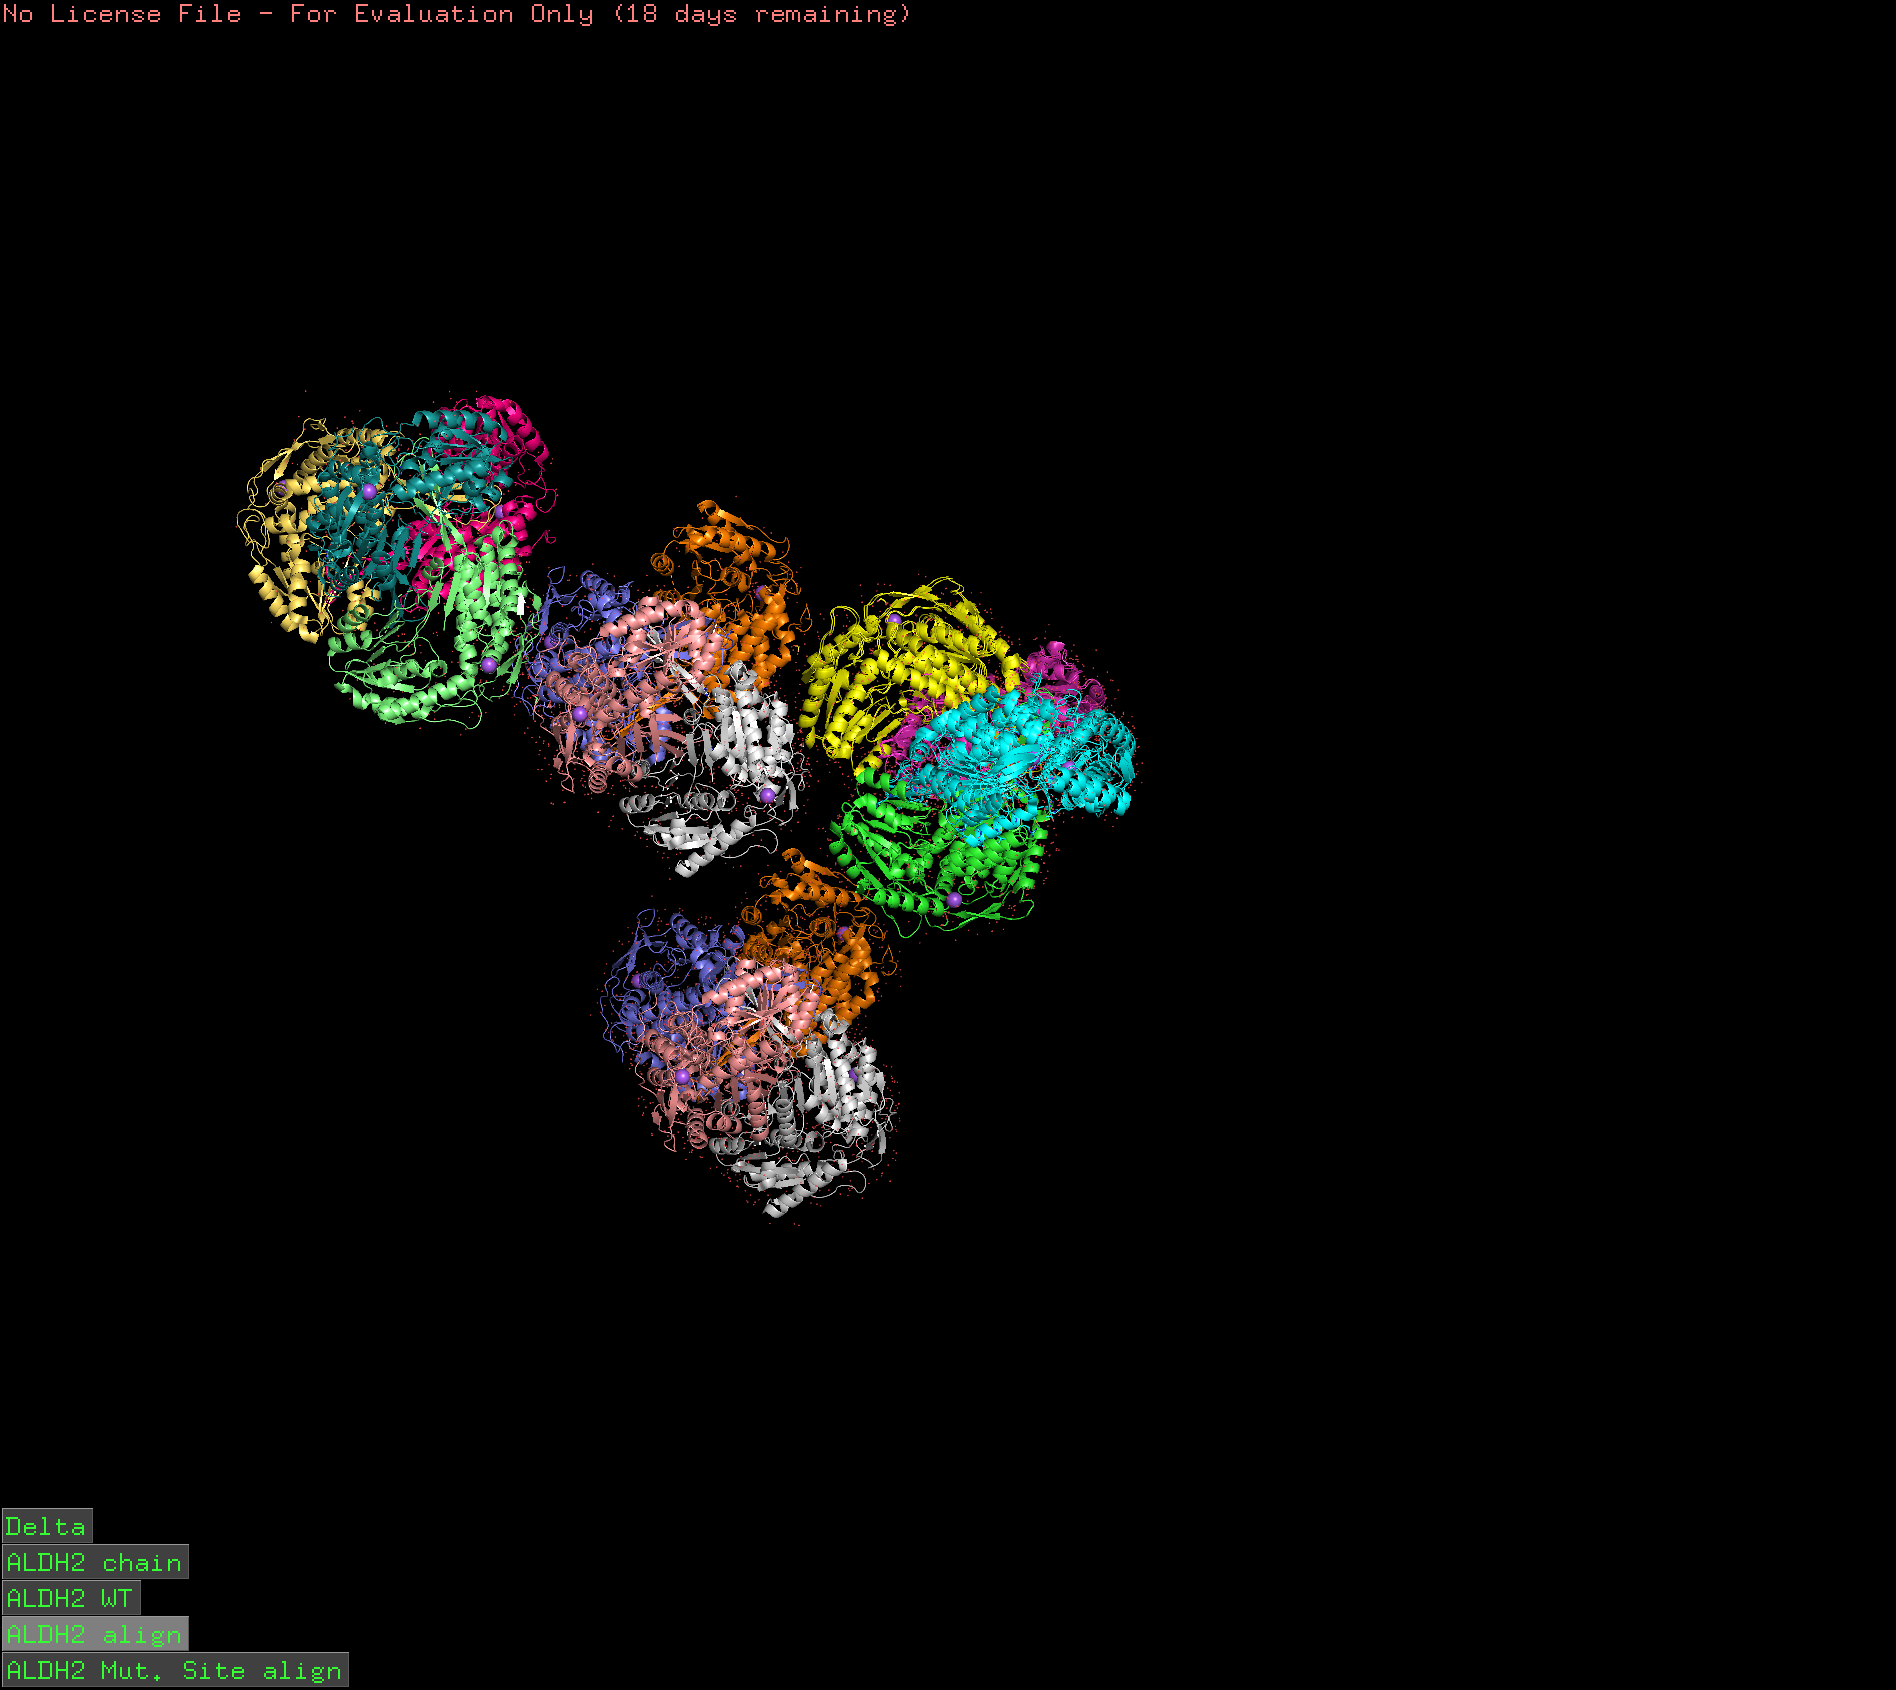

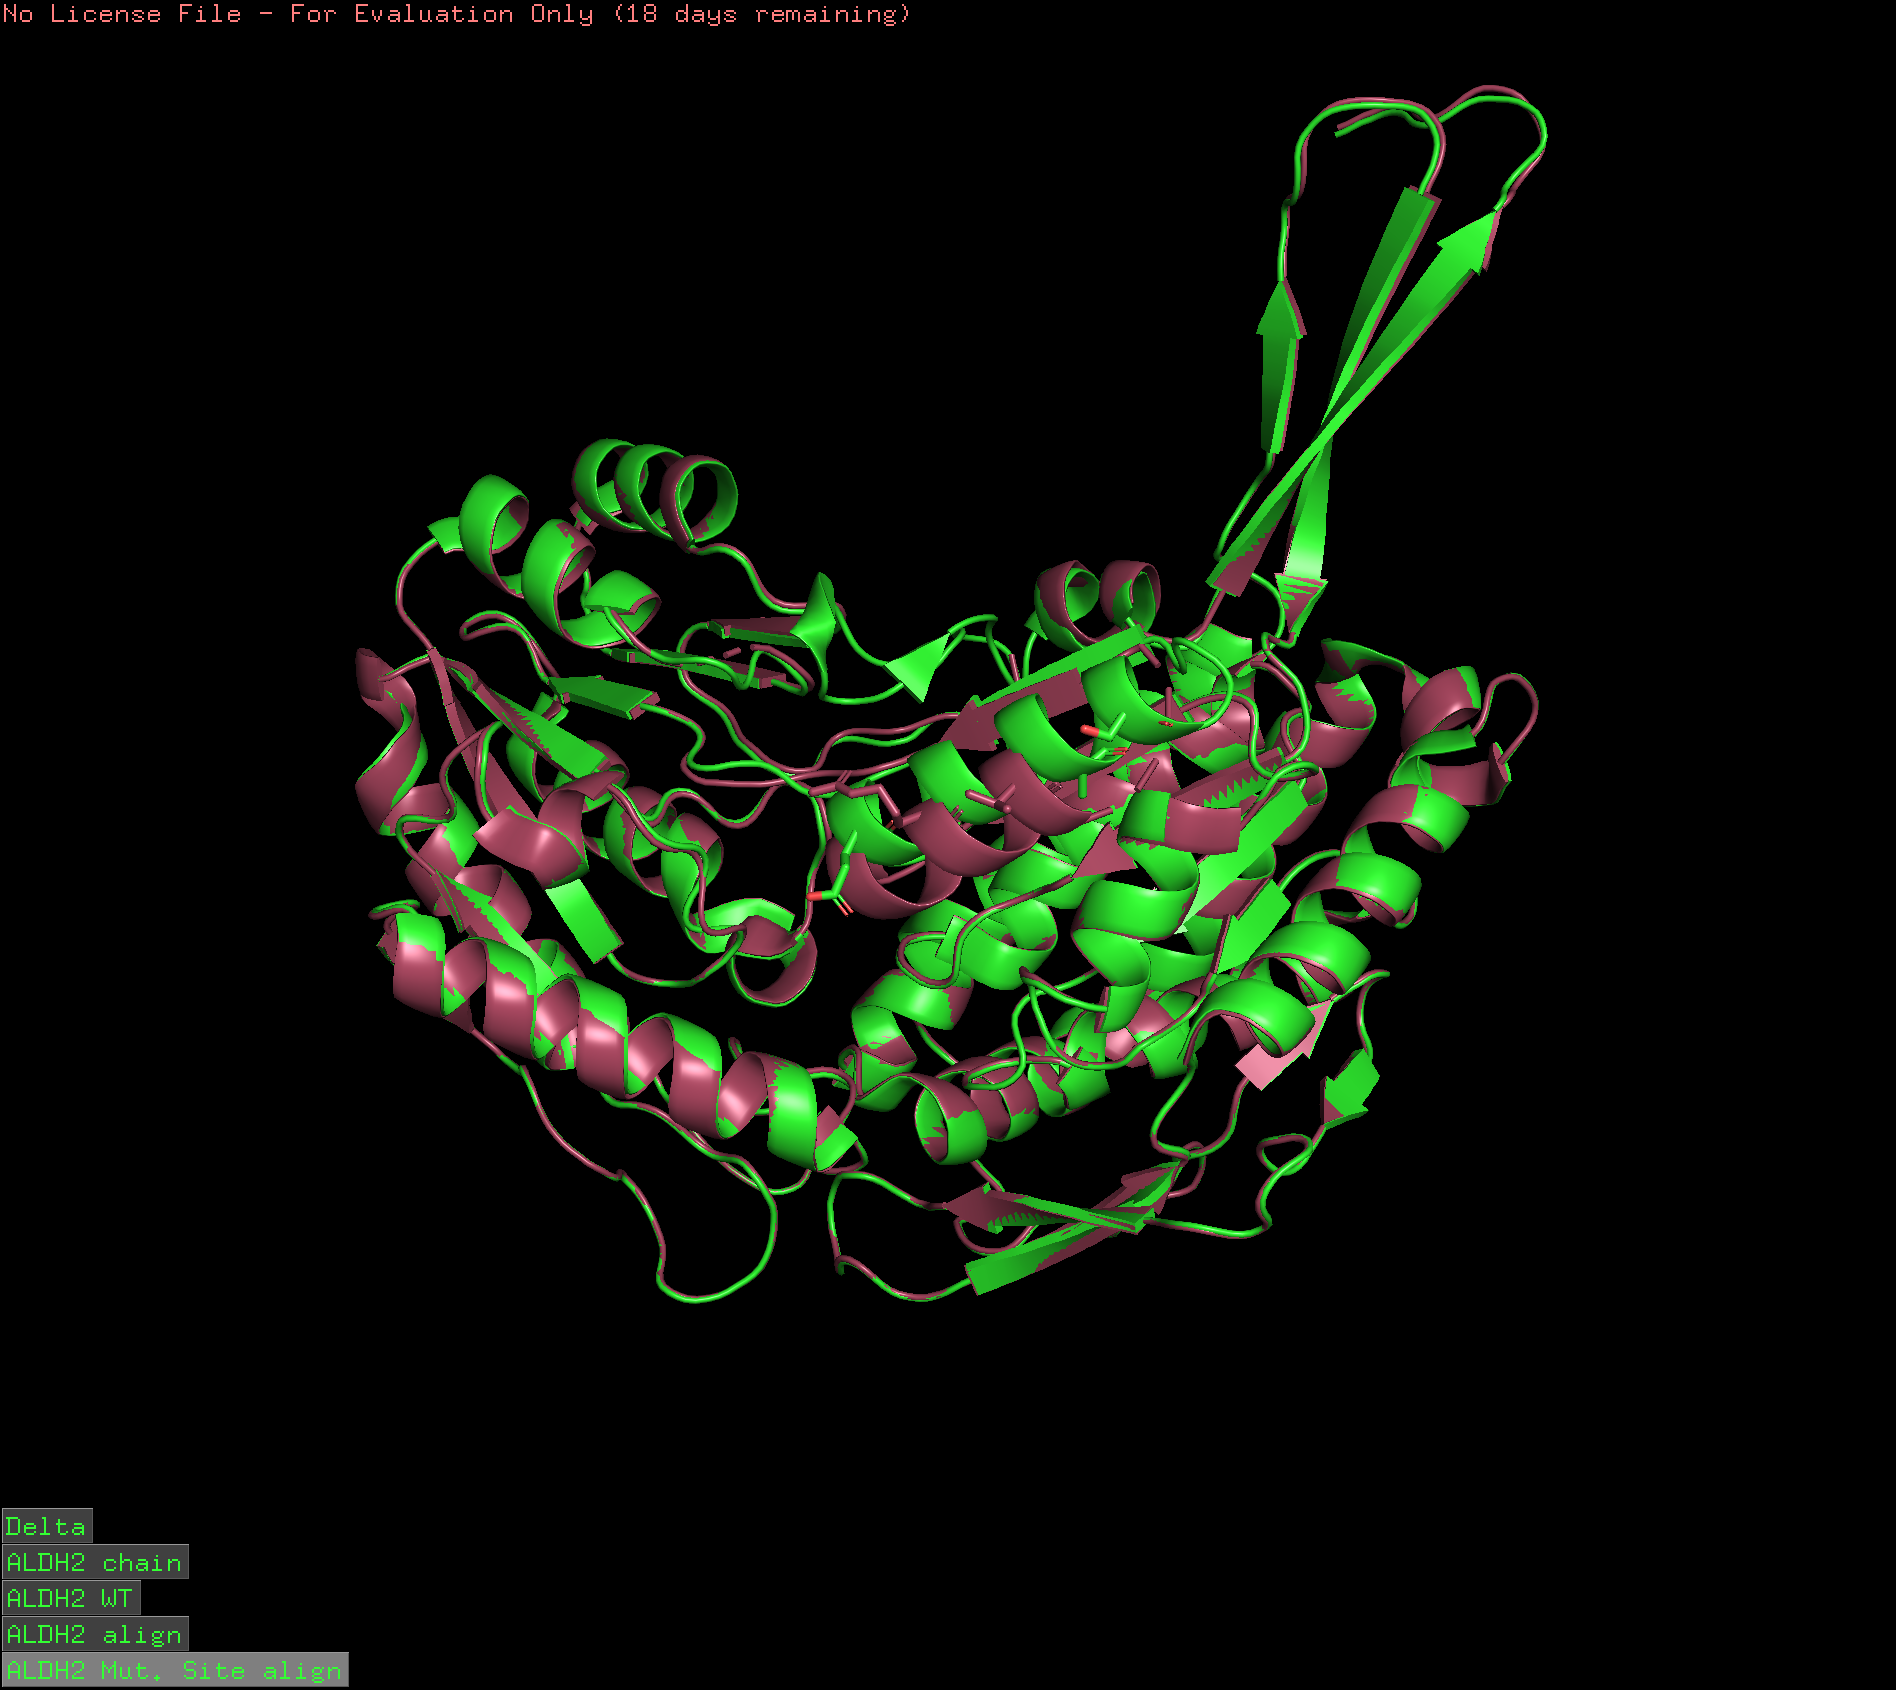

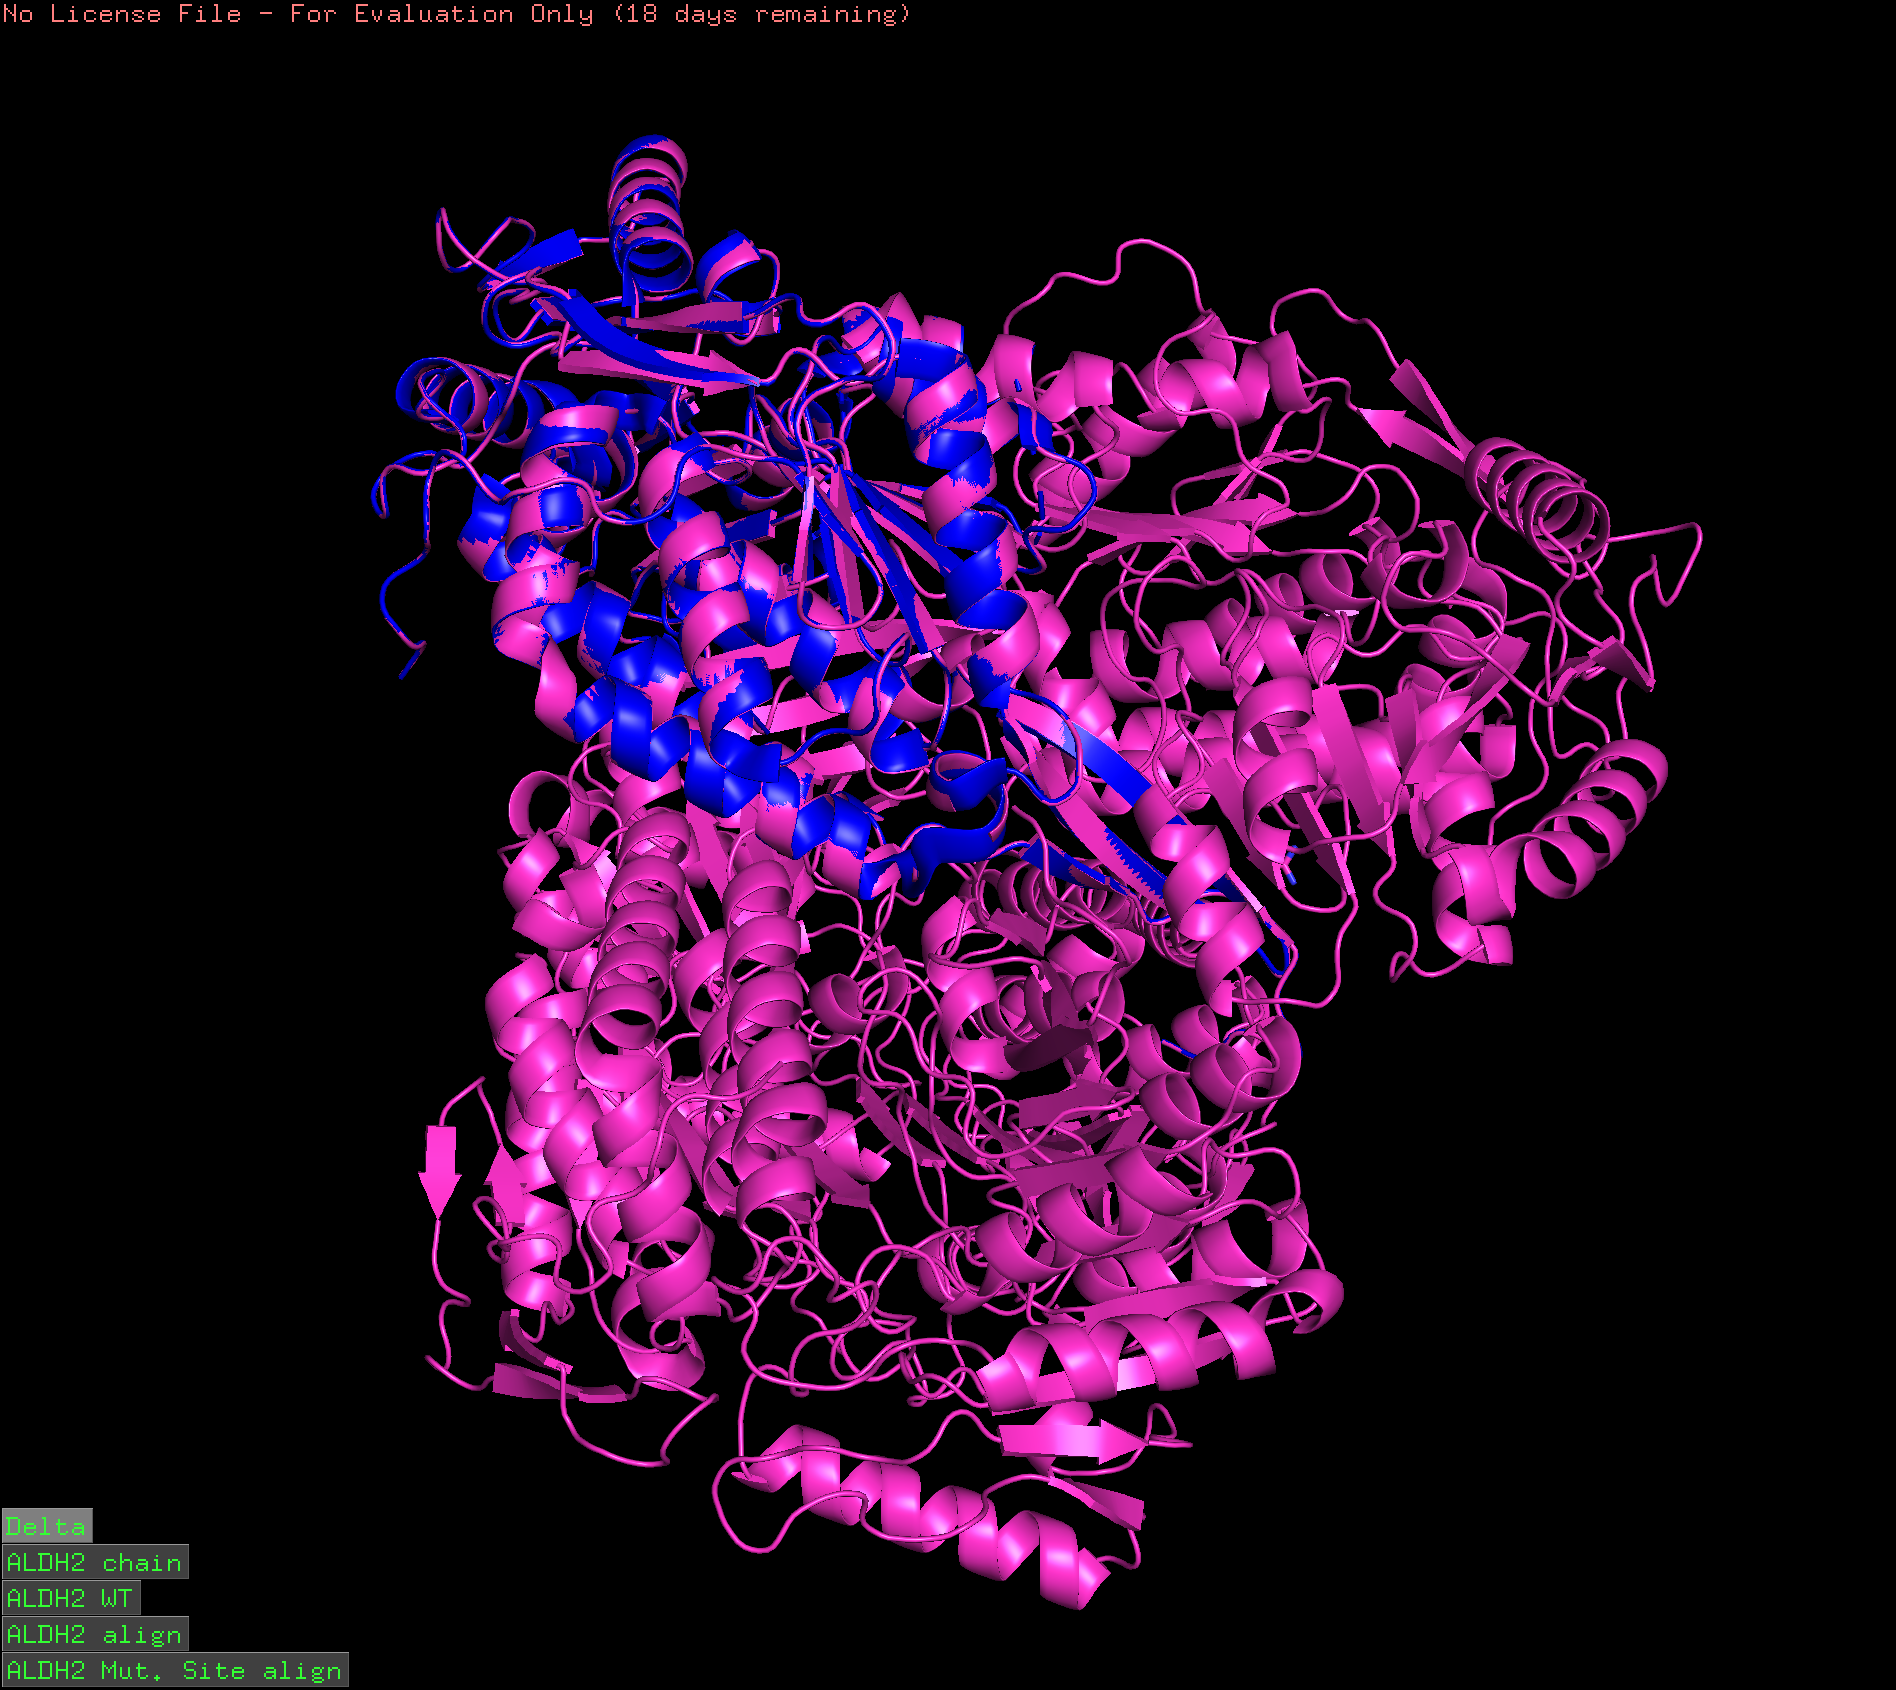

## Part 4: Analysis of the results

First, In looking at the pairwise sequence alignment, we are able to see that there is very little sequence change between the ALDH2 and ALDH2*2 mutant genes, such that we only see a singular point mutation. The Sequence Logo above shows the most common amino acids in the ALDH2 gene across 5 different organisms: human, rat, mouse, horse, and pig. Using this sequence logo, we can see that there is very little variation between the residue range spanning from 477-517. Moreover, we can see that looking at from all six sequences included in the multiple sequence alignment, only the mutant ALDH2*2 enzyme has the E->K point substitution at residue 487 (or 27 on the Sequence Logo). Given that both the Homology Model and the  3D Protein Measurements were generated focusing solely on the human protein sequences, it can be assumed that the slight differences we see in structure is attributed to that singular mutation. Going back to my thesis, although there is very little change in the protein structure of the mutant enzyme ALDH2*2 compared to the wildtype ALDH2, we can assume that the single point mutation at residue 487 is likely responsible for the conformational change in structure and that this change has an effect on the efficacy of enzymatic activity in alcohol metabolism.  